# An example measurement using the ImpTube package

This example shows a simple transfer-function impedance tube measurement.

## Method 1: With use of `Sample` class
includes saving to wav files automatically, interacts a lot with saved recordings

In [1]:
import imptube as imp

tube = imp.Tube(
    further_mic_dist=0.3,
    closer_mic_dist=0.1,
    freq_limit=1000)

measurement = imp.Measurement(device=15)

sample = imp.Sample("test1",
    temperature=29,
    rel_humidity=30,
    tube=tube)

/home/jund/Dokumenty/Python/imptube/processing/filters.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray([pf_1_time, pf_2_time]).astype(np.float32)
/home/jund/Dokumenty/Python/imptube/processing/files.py:20: WavFileWarning: Chunk (non-data) not understood, skipping it.
  return wav.read(path)


IndexError: list index out of range

In [ ]:
imp.calibration(
    sample=sample,
    measurement=measurement
)

In [ ]:
imp.single_measurement(
    sample=sample,
    measurement=measurement,
    depth=160
)

In [ ]:
alpha, f = imp.calculate_alpha(sample=sample)

## Method 2: Without the `Sample` class
This method goes through the measurement procedure without saving any data.

In [9]:
import imptube as imp

temp = 29  # Temperature in degrees Celsius
humidity = 30  # Humidity level in percentage
atm_pressure = 101300  # Atmospheric pressure in Pascal

tube = imp.Tube(
    further_mic_dist=0.4,
    closer_mic_dist=0.1,
    freq_limit=1000
)

measurement = imp.Measurement(device=15)  # Create an instance of the Measurement class

# Perform the configuration 1 measurement
data, fs = measurement.measure(export=False, thd_filter=True)  
p11, p12 = imp.stereo_to_spectra(data.T)
freqs = imp.frequencies(p11, fs)

input("Ready to measure in the second configuration?") 

# Perform the configuration 2 measurement
data, fs = measurement.measure(export=False, thd_filter=True)
p21, p22 = imp.stereo_to_spectra(data.T)

# Calculate the calibration factor based on the spectra
cf = imp.calibration_factor(p11, p12, p21, p22)
# Calculate the transfer function based on the spectra
# of the first configuration
tf = imp.transfer_function(p11, p12)  

# Correct the transfer function using the calibration factor
tf_corrected = tf / cf  
tf_I, tf_R = imp.tf_i_r(temp, freqs, tube.mic_spacing)

# Calculate the reflection factor, absorption coefficient and 
# surface impedance based on the transfer function and other parameters
refl_factor = imp.reflection_factor(tf_I, tf_R, tf_corrected, temp, freqs, tube.closer_mic_dist)  

absorption_coeff = imp.absorption_coefficient(refl_factor)

surf_impedance = imp.surface_impedance(refl_factor, temp, atm_pressure)

/home/jund/Dokumenty/Python/imptube/processing/filters.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray([pf_1_time, pf_2_time]).astype(np.float32)


(0.0, 1.0)

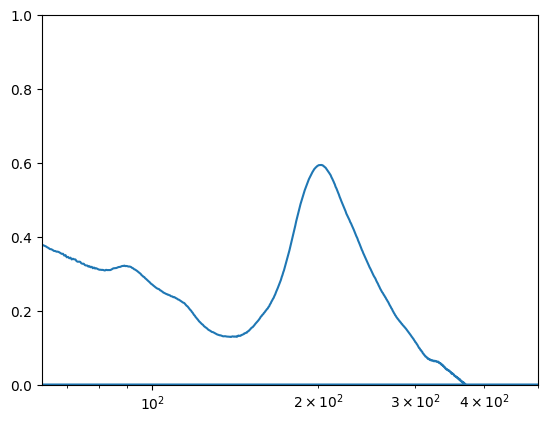

In [10]:
import matplotlib.pyplot as plt
plt.semilogx(freqs, absorption_coeff)
plt.xlim([63,500])
plt.ylim([0,1])